In [1]:
import numpy as np
import keras
from keras import layers

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 6s 15ms/step - loss: 0.3701 - accuracy: 0.8871 - val_loss: 0.0885 - val_accuracy: 0.9745
Epoch 2/15
422/422 [==============================] - 6s 14ms/step - loss: 0.1135 - accuracy: 0.9649 - val_loss: 0.0566 - val_accuracy: 0.9838
Epoch 3/15
422/422 [==============================] - 6s 14ms/step - loss: 0.0832 - accuracy: 0.9736 - val_loss: 0.0487 - val_accuracy: 0.9850
Epoch 4/15
422/422 [==============================] - 6s 14ms/step - loss: 0.0698 - accuracy: 0.9780 - val_loss: 0.0402 - val_accuracy: 0.9887
Epoch 5/15
422/422 [==============================] - 6s 14ms/step - loss: 0.0604 - accuracy: 0.9817 - val_loss: 0.0409 - val_accuracy: 0.9873
Epoch 6/15
422/422 [==============================] - 6s 14ms/step - loss: 0.0557 - accuracy: 0.9831 - val_loss: 0.0355 - val_accuracy: 0.9908
Epoch 7/15
422/422 [==============================] - 6s 14ms/step - loss: 0.0512 - accuracy: 0.9839 - val_loss: 0.0331 - val_accuracy: 0.9903

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.026542916893959045
Test accuracy: 0.9908000230789185


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 7ms/step


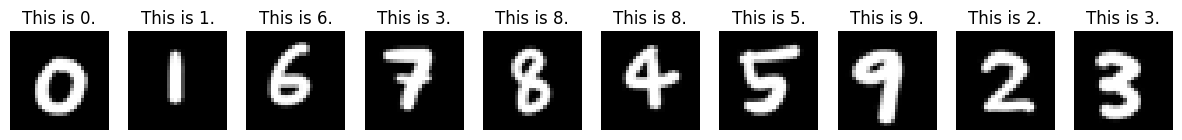

In [47]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

## 画像フォルダ内のすべてのファイルに対して処理を実行
fig, axs = plt.subplots(1, 10, figsize=(15, 5))

for i, fig_file in enumerate(os.listdir("./numbers")):
    path2fig = os.path.join("./numbers", fig_file)
    
    im = Image.open(path2fig)
    im.thumbnail((28, 28))
    x = np.array(im.convert('L'))[np.newaxis]
    n = np.argmax(model.predict(x))
    
    axs[i].imshow(im, cmap='gray')
    axs[i].set_title("This is {}.".format(n))
    axs[i].axis('off')

plt.show()
